In [2]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithm

from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
train = pd.read_csv('F:/pdfs/titanic kaggle dataset/train.csv')
test = pd.read_csv('F:/pdfs/titanic kaggle dataset/test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


This shows that there are only 3 attributes with NaN values

In [7]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index = ['survived', 'dead']
    df.plot(kind='bar', stacked=False, figsize=(10,5))

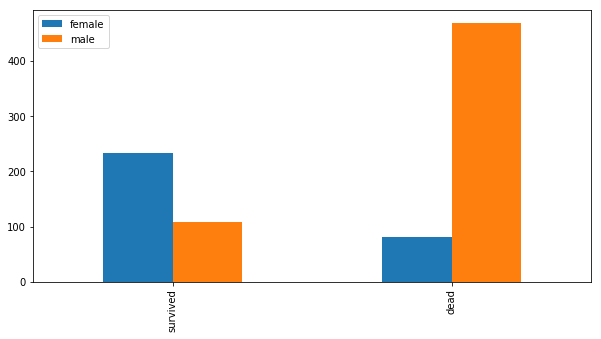

In [9]:
bar_chart('Sex')

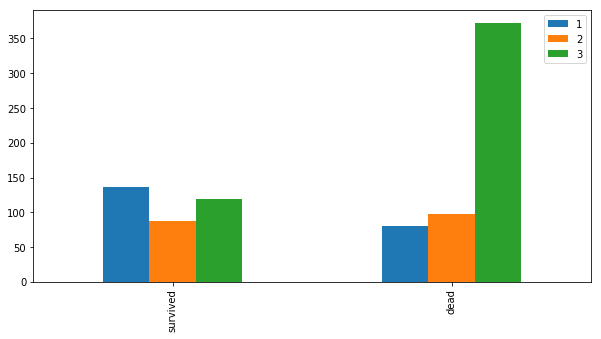

In [10]:
bar_chart('Pclass')

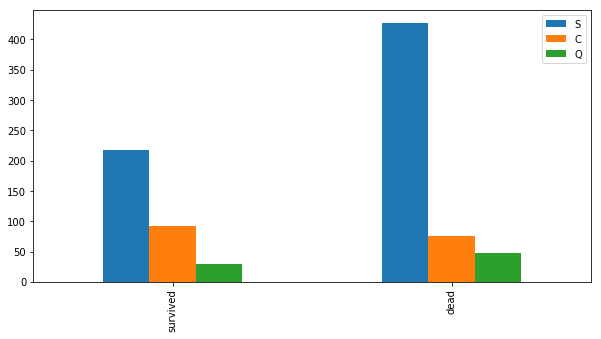

In [11]:
bar_chart('Embarked')

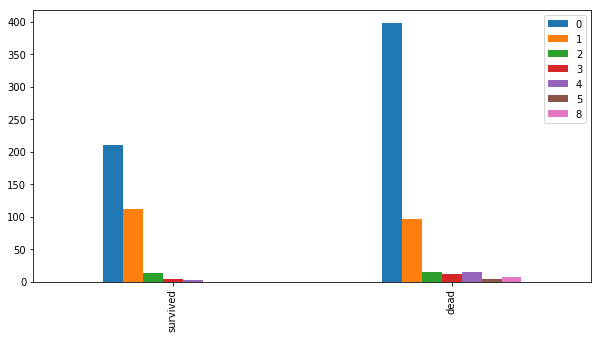

In [12]:
bar_chart('SibSp')

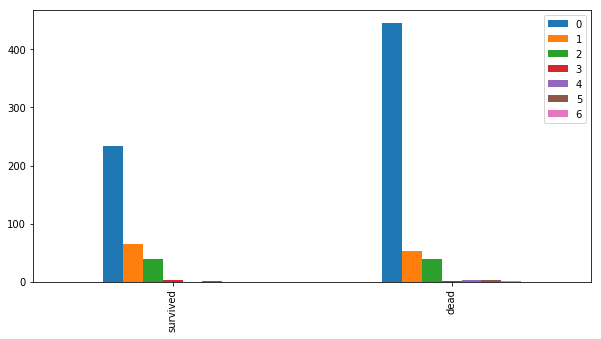

In [13]:
bar_chart('Parch')

In [14]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, '_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, '_alone'] = 1
    dataset['_alone'] = dataset['_alone'].astype(int)
    train['_alone'].value_counts()

In [15]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

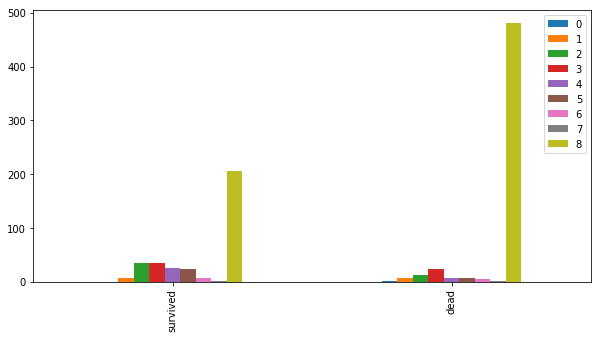

In [16]:
bar_chart('Deck')

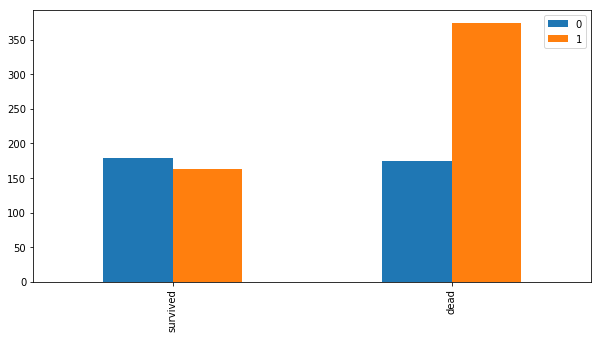

In [17]:
bar_chart('_alone')

In [19]:
data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

In [20]:
train["Age"].isnull().sum()

0

In [21]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)
train = train.drop(['SibSp'], axis=1)
test = test.drop(['Parch'], axis=1)
train = train.drop(['Parch'], axis=1)
test = test.drop(['SibSp'], axis=1)

In [22]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked', 'relatives', '_alone', 'Deck'], dtype=object)

In [23]:
train.Sex.isnull().sum()


0

In [24]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    dataset['Embarked'] = dataset['Embarked'].fillna(0)

In [25]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [26]:
train["Fare"].isnull().sum()

0

In [27]:
train.Fare.head(10)

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64

In [39]:
Fxx=train["Fare"].mean()

In [40]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(Fxx)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [28]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr',\
                                                 'Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(titles)

In [29]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [30]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare',
       'Embarked', 'relatives', '_alone', 'Deck', 'Title'], dtype=object)

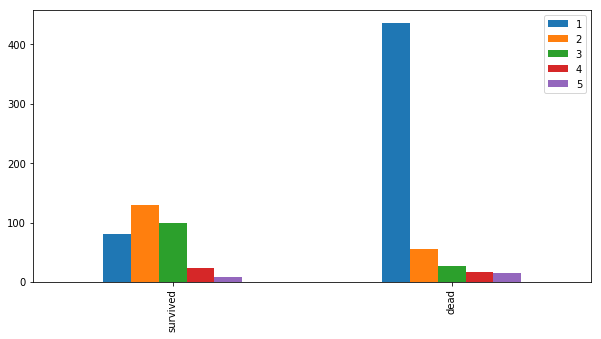

In [31]:
bar_chart('Title')

In [32]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

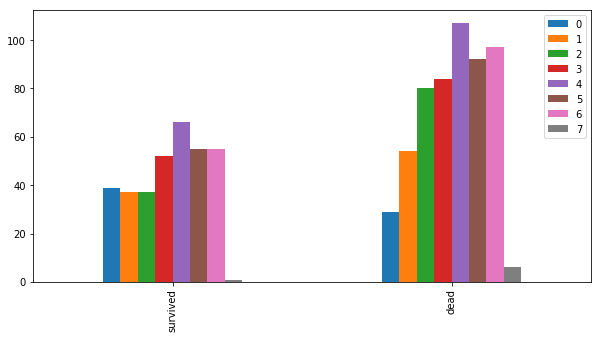

In [33]:
bar_chart('Age')

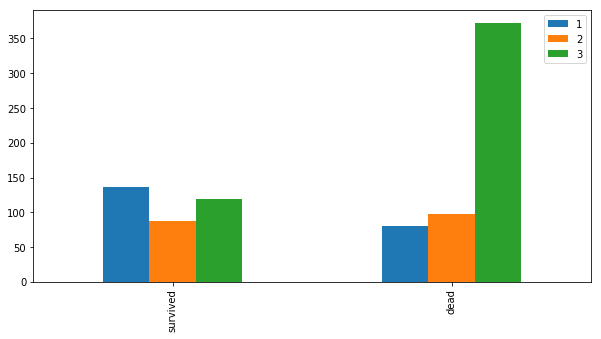

In [34]:
bar_chart('Pclass')

In [36]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age              int32
Fare           float64
Embarked       float64
relatives        int64
_alone           int32
Deck             int32
Title            int64
dtype: object

In [37]:
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].astype(int)

In [38]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age              int32
Fare           float64
Embarked         int32
relatives        int64
_alone           int32
Deck             int32
Title            int64
dtype: object

In [45]:
X = train.drop("Survived", axis=1)
Y = train["Survived"]


In [66]:
cat_feat=['Pclass', 'Sex', 'Age', 'Embarked', '_alone', 'Title', 'Deck']

In [67]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=.82,random_state=1234)

In [68]:
model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=87)

In [69]:
model.fit(xtrain,ytrain,cat_features=cat_feat,eval_set=(xtest,ytest))

Learning rate set to 0.029319
0:	learn: 0.8136986	test: 0.7639752	best: 0.7639752 (0)	total: 43.5ms	remaining: 43.5s
1:	learn: 0.8123288	test: 0.8012422	best: 0.8012422 (1)	total: 63.7ms	remaining: 31.8s
2:	learn: 0.8109589	test: 0.8136646	best: 0.8136646 (2)	total: 97.5ms	remaining: 32.4s
3:	learn: 0.8219178	test: 0.8198758	best: 0.8198758 (3)	total: 119ms	remaining: 29.6s
4:	learn: 0.8246575	test: 0.8198758	best: 0.8198758 (3)	total: 132ms	remaining: 26.3s
5:	learn: 0.8260274	test: 0.8260870	best: 0.8260870 (5)	total: 139ms	remaining: 23s
6:	learn: 0.8246575	test: 0.8260870	best: 0.8260870 (5)	total: 141ms	remaining: 20s
7:	learn: 0.8232877	test: 0.8198758	best: 0.8260870 (5)	total: 148ms	remaining: 18.3s
8:	learn: 0.8232877	test: 0.8322981	best: 0.8322981 (8)	total: 152ms	remaining: 16.7s
9:	learn: 0.8232877	test: 0.8385093	best: 0.8385093 (9)	total: 177ms	remaining: 17.5s
10:	learn: 0.8301370	test: 0.8509317	best: 0.8509317 (10)	total: 185ms	remaining: 16.6s
11:	learn: 0.8273973	te

110:	learn: 0.8616438	test: 0.8447205	best: 0.8633540 (24)	total: 718ms	remaining: 5.75s
111:	learn: 0.8602740	test: 0.8447205	best: 0.8633540 (24)	total: 727ms	remaining: 5.76s
112:	learn: 0.8616438	test: 0.8447205	best: 0.8633540 (24)	total: 732ms	remaining: 5.74s
113:	learn: 0.8616438	test: 0.8447205	best: 0.8633540 (24)	total: 741ms	remaining: 5.76s
114:	learn: 0.8630137	test: 0.8447205	best: 0.8633540 (24)	total: 766ms	remaining: 5.89s
115:	learn: 0.8657534	test: 0.8447205	best: 0.8633540 (24)	total: 770ms	remaining: 5.87s
116:	learn: 0.8657534	test: 0.8447205	best: 0.8633540 (24)	total: 775ms	remaining: 5.85s
117:	learn: 0.8643836	test: 0.8447205	best: 0.8633540 (24)	total: 784ms	remaining: 5.86s
118:	learn: 0.8643836	test: 0.8447205	best: 0.8633540 (24)	total: 790ms	remaining: 5.85s
119:	learn: 0.8630137	test: 0.8447205	best: 0.8633540 (24)	total: 792ms	remaining: 5.81s
120:	learn: 0.8630137	test: 0.8447205	best: 0.8633540 (24)	total: 800ms	remaining: 5.81s
121:	learn: 0.8630137

203:	learn: 0.8835616	test: 0.8509317	best: 0.8633540 (24)	total: 1.48s	remaining: 5.78s
204:	learn: 0.8835616	test: 0.8509317	best: 0.8633540 (24)	total: 1.49s	remaining: 5.78s
205:	learn: 0.8835616	test: 0.8509317	best: 0.8633540 (24)	total: 1.5s	remaining: 5.78s
206:	learn: 0.8835616	test: 0.8509317	best: 0.8633540 (24)	total: 1.5s	remaining: 5.75s
207:	learn: 0.8835616	test: 0.8509317	best: 0.8633540 (24)	total: 1.51s	remaining: 5.75s
208:	learn: 0.8835616	test: 0.8509317	best: 0.8633540 (24)	total: 1.52s	remaining: 5.75s
209:	learn: 0.8835616	test: 0.8509317	best: 0.8633540 (24)	total: 1.53s	remaining: 5.74s
210:	learn: 0.8835616	test: 0.8509317	best: 0.8633540 (24)	total: 1.54s	remaining: 5.75s
211:	learn: 0.8835616	test: 0.8509317	best: 0.8633540 (24)	total: 1.54s	remaining: 5.72s
212:	learn: 0.8821918	test: 0.8509317	best: 0.8633540 (24)	total: 1.55s	remaining: 5.72s
213:	learn: 0.8821918	test: 0.8509317	best: 0.8633540 (24)	total: 1.55s	remaining: 5.7s
214:	learn: 0.8821918	te

314:	learn: 0.9000000	test: 0.8447205	best: 0.8633540 (24)	total: 2.44s	remaining: 5.3s
315:	learn: 0.9041096	test: 0.8447205	best: 0.8633540 (24)	total: 2.45s	remaining: 5.29s
316:	learn: 0.9041096	test: 0.8447205	best: 0.8633540 (24)	total: 2.46s	remaining: 5.29s
317:	learn: 0.9027397	test: 0.8447205	best: 0.8633540 (24)	total: 2.47s	remaining: 5.29s
318:	learn: 0.9041096	test: 0.8447205	best: 0.8633540 (24)	total: 2.48s	remaining: 5.28s
319:	learn: 0.9041096	test: 0.8447205	best: 0.8633540 (24)	total: 2.5s	remaining: 5.32s
320:	learn: 0.9041096	test: 0.8447205	best: 0.8633540 (24)	total: 2.52s	remaining: 5.32s
321:	learn: 0.9054795	test: 0.8447205	best: 0.8633540 (24)	total: 2.52s	remaining: 5.31s
322:	learn: 0.9054795	test: 0.8447205	best: 0.8633540 (24)	total: 2.54s	remaining: 5.33s
323:	learn: 0.9054795	test: 0.8447205	best: 0.8633540 (24)	total: 2.55s	remaining: 5.32s
324:	learn: 0.9054795	test: 0.8447205	best: 0.8633540 (24)	total: 2.55s	remaining: 5.3s
325:	learn: 0.9054795	te

426:	learn: 0.9260274	test: 0.8385093	best: 0.8633540 (24)	total: 3.59s	remaining: 4.82s
427:	learn: 0.9260274	test: 0.8385093	best: 0.8633540 (24)	total: 3.6s	remaining: 4.81s
428:	learn: 0.9260274	test: 0.8385093	best: 0.8633540 (24)	total: 3.61s	remaining: 4.8s
429:	learn: 0.9260274	test: 0.8385093	best: 0.8633540 (24)	total: 3.62s	remaining: 4.8s
430:	learn: 0.9260274	test: 0.8385093	best: 0.8633540 (24)	total: 3.63s	remaining: 4.79s
431:	learn: 0.9260274	test: 0.8385093	best: 0.8633540 (24)	total: 3.64s	remaining: 4.78s
432:	learn: 0.9260274	test: 0.8385093	best: 0.8633540 (24)	total: 3.65s	remaining: 4.78s
433:	learn: 0.9260274	test: 0.8385093	best: 0.8633540 (24)	total: 3.65s	remaining: 4.76s
434:	learn: 0.9260274	test: 0.8385093	best: 0.8633540 (24)	total: 3.66s	remaining: 4.75s
435:	learn: 0.9260274	test: 0.8385093	best: 0.8633540 (24)	total: 3.67s	remaining: 4.75s
436:	learn: 0.9260274	test: 0.8385093	best: 0.8633540 (24)	total: 3.68s	remaining: 4.74s
437:	learn: 0.9260274	te

535:	learn: 0.9397260	test: 0.8385093	best: 0.8633540 (24)	total: 4.53s	remaining: 3.92s
536:	learn: 0.9397260	test: 0.8385093	best: 0.8633540 (24)	total: 4.53s	remaining: 3.91s
537:	learn: 0.9397260	test: 0.8385093	best: 0.8633540 (24)	total: 4.54s	remaining: 3.9s
538:	learn: 0.9397260	test: 0.8385093	best: 0.8633540 (24)	total: 4.55s	remaining: 3.89s
539:	learn: 0.9397260	test: 0.8385093	best: 0.8633540 (24)	total: 4.56s	remaining: 3.88s
540:	learn: 0.9397260	test: 0.8385093	best: 0.8633540 (24)	total: 4.57s	remaining: 3.88s
541:	learn: 0.9397260	test: 0.8385093	best: 0.8633540 (24)	total: 4.58s	remaining: 3.87s
542:	learn: 0.9397260	test: 0.8385093	best: 0.8633540 (24)	total: 4.59s	remaining: 3.86s
543:	learn: 0.9397260	test: 0.8385093	best: 0.8633540 (24)	total: 4.6s	remaining: 3.85s
544:	learn: 0.9397260	test: 0.8447205	best: 0.8633540 (24)	total: 4.61s	remaining: 3.85s
545:	learn: 0.9397260	test: 0.8447205	best: 0.8633540 (24)	total: 4.62s	remaining: 3.84s
546:	learn: 0.9410959	t

646:	learn: 0.9452055	test: 0.8447205	best: 0.8633540 (24)	total: 5.5s	remaining: 3s
647:	learn: 0.9452055	test: 0.8447205	best: 0.8633540 (24)	total: 5.51s	remaining: 2.99s
648:	learn: 0.9452055	test: 0.8447205	best: 0.8633540 (24)	total: 5.54s	remaining: 3s
649:	learn: 0.9452055	test: 0.8447205	best: 0.8633540 (24)	total: 5.55s	remaining: 2.99s
650:	learn: 0.9465753	test: 0.8447205	best: 0.8633540 (24)	total: 5.55s	remaining: 2.98s
651:	learn: 0.9465753	test: 0.8447205	best: 0.8633540 (24)	total: 5.56s	remaining: 2.97s
652:	learn: 0.9479452	test: 0.8447205	best: 0.8633540 (24)	total: 5.57s	remaining: 2.96s
653:	learn: 0.9479452	test: 0.8447205	best: 0.8633540 (24)	total: 5.58s	remaining: 2.95s
654:	learn: 0.9479452	test: 0.8447205	best: 0.8633540 (24)	total: 5.59s	remaining: 2.94s
655:	learn: 0.9493151	test: 0.8447205	best: 0.8633540 (24)	total: 5.6s	remaining: 2.94s
656:	learn: 0.9493151	test: 0.8447205	best: 0.8633540 (24)	total: 5.61s	remaining: 2.93s
657:	learn: 0.9493151	test: 0

747:	learn: 0.9547945	test: 0.8385093	best: 0.8633540 (24)	total: 6.43s	remaining: 2.17s
748:	learn: 0.9561644	test: 0.8385093	best: 0.8633540 (24)	total: 6.44s	remaining: 2.16s
749:	learn: 0.9561644	test: 0.8385093	best: 0.8633540 (24)	total: 6.45s	remaining: 2.15s
750:	learn: 0.9575342	test: 0.8385093	best: 0.8633540 (24)	total: 6.46s	remaining: 2.14s
751:	learn: 0.9561644	test: 0.8385093	best: 0.8633540 (24)	total: 6.46s	remaining: 2.13s
752:	learn: 0.9561644	test: 0.8385093	best: 0.8633540 (24)	total: 6.47s	remaining: 2.12s
753:	learn: 0.9561644	test: 0.8385093	best: 0.8633540 (24)	total: 6.48s	remaining: 2.11s
754:	learn: 0.9561644	test: 0.8385093	best: 0.8633540 (24)	total: 6.49s	remaining: 2.1s
755:	learn: 0.9561644	test: 0.8385093	best: 0.8633540 (24)	total: 6.49s	remaining: 2.1s
756:	learn: 0.9561644	test: 0.8385093	best: 0.8633540 (24)	total: 6.5s	remaining: 2.09s
757:	learn: 0.9561644	test: 0.8385093	best: 0.8633540 (24)	total: 6.51s	remaining: 2.08s
758:	learn: 0.9561644	te

855:	learn: 0.9630137	test: 0.8385093	best: 0.8633540 (24)	total: 7.36s	remaining: 1.24s
856:	learn: 0.9630137	test: 0.8385093	best: 0.8633540 (24)	total: 7.36s	remaining: 1.23s
857:	learn: 0.9630137	test: 0.8385093	best: 0.8633540 (24)	total: 7.36s	remaining: 1.22s
858:	learn: 0.9630137	test: 0.8385093	best: 0.8633540 (24)	total: 7.37s	remaining: 1.21s
859:	learn: 0.9630137	test: 0.8385093	best: 0.8633540 (24)	total: 7.38s	remaining: 1.2s
860:	learn: 0.9630137	test: 0.8385093	best: 0.8633540 (24)	total: 7.38s	remaining: 1.19s
861:	learn: 0.9630137	test: 0.8385093	best: 0.8633540 (24)	total: 7.39s	remaining: 1.18s
862:	learn: 0.9630137	test: 0.8385093	best: 0.8633540 (24)	total: 7.4s	remaining: 1.17s
863:	learn: 0.9630137	test: 0.8385093	best: 0.8633540 (24)	total: 7.4s	remaining: 1.17s
864:	learn: 0.9630137	test: 0.8385093	best: 0.8633540 (24)	total: 7.41s	remaining: 1.16s
865:	learn: 0.9630137	test: 0.8385093	best: 0.8633540 (24)	total: 7.42s	remaining: 1.15s
866:	learn: 0.9630137	te

948:	learn: 0.9684932	test: 0.8322981	best: 0.8633540 (24)	total: 8.14s	remaining: 438ms
949:	learn: 0.9684932	test: 0.8322981	best: 0.8633540 (24)	total: 8.15s	remaining: 429ms
950:	learn: 0.9684932	test: 0.8322981	best: 0.8633540 (24)	total: 8.16s	remaining: 421ms
951:	learn: 0.9684932	test: 0.8322981	best: 0.8633540 (24)	total: 8.17s	remaining: 412ms
952:	learn: 0.9684932	test: 0.8322981	best: 0.8633540 (24)	total: 8.18s	remaining: 404ms
953:	learn: 0.9698630	test: 0.8322981	best: 0.8633540 (24)	total: 8.19s	remaining: 395ms
954:	learn: 0.9698630	test: 0.8322981	best: 0.8633540 (24)	total: 8.2s	remaining: 387ms
955:	learn: 0.9698630	test: 0.8322981	best: 0.8633540 (24)	total: 8.21s	remaining: 378ms
956:	learn: 0.9698630	test: 0.8385093	best: 0.8633540 (24)	total: 8.21s	remaining: 369ms
957:	learn: 0.9698630	test: 0.8385093	best: 0.8633540 (24)	total: 8.22s	remaining: 360ms
958:	learn: 0.9698630	test: 0.8385093	best: 0.8633540 (24)	total: 8.23s	remaining: 352ms
959:	learn: 0.9684932	

In [70]:
print('the test accuracy is :{:.6f}'.format(accuracy_score(ytest,model.predict(xtest))))

the test accuracy is :0.863354


In [71]:
pred = model.predict(test)
pred = pred.astype(np.int)
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred})

In [65]:
submission.to_csv('F:/pdfs/titanic kaggle dataset/submission_catboost1.csv',index=False)